<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Youssef Abdelrahman Ahmed Abdelrazek

GUC-ID: 40-17245

Elective Tutorial No.: 8

**Member 2**

Name: Ramez Mohamed Elmasry

GUC-ID: 43-10324

Elective Tutorial No.: 8

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [13]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Edit)

In [14]:
# return (x_train, y_train), (x_test, y_test)
train_airplane = np.array(
        [plt.imread('Data/train/airplane/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
test_airplane = np.array([plt.imread('Data/test/airplane/' + str(i) + '.jpg').reshape(-1) for i in range(1, 1000)])
train_automobile = np.array(
    [plt.imread('Data/train/automobile/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
test_automobile = np.array(
    [plt.imread('Data/test/automobile/' + str(i) + '.jpg').reshape(-1) for i in range(1, 1000)])
train_frog = np.array([plt.imread('Data/train/frog/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
test_frog = np.array([plt.imread('Data/test/frog/' + str(i) + '.jpg').reshape(-1) for i in range(1, 1000)])

train_airplane_normalized = train_airplane / 255
train_automobile_normalized = train_automobile / 255
train_frog_normalized = train_frog / 255
test_airplane_normalized = test_airplane / 255
test_automobile_normalized = test_automobile / 255
test_frog_normalized = test_frog / 255
X_test = np.array(np.concatenate((test_airplane_normalized,test_automobile_normalized,test_frog_normalized)))
    

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [15]:
# Write code here
# Train
# Test
# confusion_matrix = 


    # Airplane
m_a = train_airplane_normalized.mean(axis=0).reshape(1, -1)
x_minus_m_a = train_airplane_normalized - m_a
m_not_a = np.concatenate((train_automobile_normalized, train_frog_normalized)).mean(axis=0).reshape(1, -1)
x_minus_m_not_a = train_airplane_normalized - m_not_a
x_minus_m_a_T = x_minus_m_a.transpose()
x_minus_m_not_a_T = x_minus_m_not_a.transpose()
sw_a = np.dot(x_minus_m_a_T, x_minus_m_a)
sw_not_a = np.dot(x_minus_m_not_a_T, x_minus_m_not_a)
sw = sw_a + sw_not_a
sw_inverse = np.linalg.pinv(sw)
classifier_airplane = np.dot(sw_inverse, m_a.reshape(-1, 1) - m_not_a.reshape(-1, 1))
wnode_airplane = np.dot(classifier_airplane.transpose(), -0.5 * (m_a.reshape(-1, 1) + m_not_a.reshape(-1, 1)))

    # Automobile
m_a_automobile = train_automobile_normalized.mean(axis=0).reshape(1, -1)
x_minus_m_a_automobile = train_automobile_normalized - m_a_automobile
m_not_a_automobile = np.concatenate((train_airplane_normalized, train_frog_normalized)).mean(axis=0).reshape(1, -1)
x_minus_m_not_a_automobile = train_automobile_normalized - m_not_a_automobile
x_minus_m_a_T_automobile = x_minus_m_a_automobile.transpose()
x_minus_m_not_a_T_automobile = x_minus_m_not_a_automobile.transpose()
sw_a_automobile = np.dot(x_minus_m_a_T_automobile, x_minus_m_a_automobile)
sw_not_a_automobile = np.dot(x_minus_m_not_a_T_automobile, x_minus_m_not_a_automobile)
sw_automobile = sw_a_automobile + sw_not_a_automobile
sw_inverse_automobile = np.linalg.pinv(sw_automobile)
classifier_automobile = np.dot(sw_inverse_automobile,
                                   m_a_automobile.reshape(-1, 1) - m_not_a_automobile.reshape(-1, 1))
wnode_automobile = np.dot(classifier_automobile.transpose(),
                           -0.5 * (m_a_automobile.reshape(-1, 1) + m_not_a_automobile.reshape(-1, 1)))

    # Frog
m_a_frog = train_frog_normalized.mean(axis=0).reshape(1, -1)
x_minus_m_a_frog = train_frog_normalized - m_a_frog
m_not_a_frog = np.concatenate((train_airplane_normalized, train_automobile_normalized)).mean(axis=0).reshape(1, -1)
x_minus_m_not_a_frog = train_frog_normalized - m_not_a_frog
x_minus_m_a_T_frog = x_minus_m_a_frog.transpose()
x_minus_m_not_a_T_frog = x_minus_m_not_a_frog.transpose()
sw_a_frog = np.dot(x_minus_m_a_T_frog, x_minus_m_a_frog)
sw_not_a_frog = np.dot(x_minus_m_not_a_T_frog, x_minus_m_not_a_frog)
sw_frog = sw_a_frog + sw_not_a_frog
sw_inverse_frog = np.linalg.pinv(sw_frog)
classifier_frog = np.dot(sw_inverse_frog, m_a_frog.reshape(-1, 1) - m_not_a_frog.reshape(-1, 1))
wnode_frog = np.dot(classifier_frog.transpose(), -0.5 * (m_a_frog.reshape(-1, 1) + m_not_a_frog.reshape(-1, 1)))

    # Test (step 6)
for image in X_test:
    c_airplane = np.dot(image, classifier_airplane) + wnode_airplane
    c_automobile = np.dot(image, classifier_automobile) + wnode_automobile
    c_frog = np.dot(image, classifier_frog) + wnode_frog
    classes = np.array(np.concatenate((c_airplane, c_automobile, c_frog)))
    predicted_class = np.where(classes == np.max(classes))
    if predicted_class[0][0] == 0:
        print("Airplane")
    if predicted_class[0][0] == 1:
        print("Automobile")
    if predicted_class[0][0] == 2:
        print("Frog")

    # Step 7
conf_matrix = []
count_airplane = 0
count_automobile = 0
count_frog = 0
for image in test_airplane_normalized:
    c_airplane = np.dot(image, classifier_airplane) + wnode_airplane
    c_automobile = np.dot(image, classifier_automobile) + wnode_automobile
    c_frog = np.dot(image, classifier_frog) + wnode_frog
    classes = np.array(np.concatenate((c_airplane, c_automobile, c_frog)))
    predicted_class = np.where(classes == np.max(classes))
    if predicted_class[0][0] == 0:
        count_airplane += 1
    if predicted_class[0][0] == 1:
        count_automobile += 1
    if predicted_class[0][0] == 2:
        count_frog += 1
conf_matrix.append([count_airplane, count_automobile, count_frog])
print("Count Airplane: ", count_airplane)
print("Count Automobile: ", count_automobile)
print("Count Frog: ", count_frog)
count_frog = 0
count_automobile = 0
count_airplane = 0

for image in test_automobile_normalized:
    c_airplane = np.dot(image, classifier_airplane) + wnode_airplane
    c_automobile = np.dot(image, classifier_automobile) + wnode_automobile
    c_frog = np.dot(image, classifier_frog) + wnode_frog
    classes = np.array(np.concatenate((c_airplane, c_automobile, c_frog)))
    predicted_class = np.where(classes == np.max(classes))
    if predicted_class[0][0] == 0:
        count_airplane += 1
    if predicted_class[0][0] == 1:
        count_automobile += 1
    if predicted_class[0][0] == 2:
        count_frog += 1
conf_matrix.append([count_airplane, count_automobile, count_frog])
print("Count Airplane: ", count_airplane)
print("Count Automobile: ", count_automobile)
print("Count Frog: ", count_frog)

count_frog = 0
count_automobile = 0
count_airplane = 0

for image in test_frog_normalized:
    c_airplane = np.dot(image, classifier_airplane) + wnode_airplane
    c_automobile = np.dot(image, classifier_automobile) + wnode_automobile
    c_frog = np.dot(image, classifier_frog) + wnode_frog
    classes = np.array(np.concatenate((c_airplane, c_automobile, c_frog)))
    predicted_class = np.where(classes == np.max(classes))
    if predicted_class[0][0] == 0:
        count_airplane += 1
    if predicted_class[0][0] == 1:
        count_automobile += 1
    if predicted_class[0][0] == 2:
        count_frog += 1
conf_matrix.append([count_airplane, count_automobile, count_frog])
print("Count Airplane: ", count_airplane)
print("Count Automobile: ", count_automobile)
print("Count Frog: ", count_frog)

print(conf_matrix)
confusion_matrix = np.array(conf_matrix)

Airplane
Airplane
Airplane
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Frog
Automobile
Frog
Airplane
Airplane
Airplane
Automobile
Airplane
Automobile
Frog
Airplane
Airplane
Airplane
Automobile
Airplane
Airplane
Airplane
Airplane
Airplane
Automobile
Automobile
Airplane
Airplane
Automobile
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Automobile
Frog
Airplane
Frog
Frog
Airplane
Airplane
Airplane
Airplane
Automobile
Automobile
Airplane
Airplane
Airplane
Frog
Airplane
Airplane
Airplane
Automobile
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
Frog
Frog
Frog
Frog
Airplane
Automobile
Airplane
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Automobile
Automobile
Frog
Frog
Airplane
Airplane
Automobile
Airplane
Automobile
Frog
Frog
Airplane
Automobile
Airplane
Airplane
Airplane
Frog
Airplane
Airplane
Automobile
Automobile
Airplane
Airplane
Airplane
Air

Airplane
Frog
Frog
Frog
Frog
Airplane
Frog
Airplane
Frog
Frog
Airplane
Frog
Frog
Airplane
Frog
Frog
Frog
Frog
Automobile
Frog
Frog
Automobile
Airplane
Frog
Airplane
Frog
Airplane
Frog
Frog
Frog
Automobile
Frog
Frog
Automobile
Frog
Frog
Automobile
Frog
Frog
Frog
Airplane
Frog
Frog
Frog
Airplane
Frog
Frog
Frog
Airplane
Frog
Frog
Frog
Frog
Frog
Frog
Airplane
Airplane
Frog
Frog
Automobile
Frog
Airplane
Airplane
Automobile
Automobile
Frog
Frog
Frog
Frog
Frog
Frog
Frog
Frog
Frog
Automobile
Frog
Frog
Frog
Frog
Airplane
Frog
Airplane
Frog
Frog
Airplane
Frog
Automobile
Frog
Frog
Frog
Frog
Frog
Airplane
Frog
Frog
Automobile
Automobile
Airplane
Frog
Frog
Frog
Frog
Frog
Automobile
Frog
Frog
Frog
Airplane
Frog
Airplane
Airplane
Frog
Airplane
Frog
Frog
Airplane
Airplane
Automobile
Frog
Frog
Frog
Automobile
Automobile
Frog
Automobile
Frog
Frog
Frog
Frog
Automobile
Automobile
Frog
Airplane
Frog
Frog
Automobile
Frog
Frog
Frog
Frog
Automobile
Frog
Airplane
Frog
Frog
Frog
Frog
Frog
Frog
Frog
Frog
Frog
Fr

## Confusion Matrix (Don't Edit)

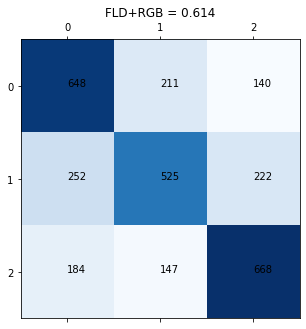

In [16]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))


### Repeat for Grayscale

In [17]:
# Write code here
# Train
# Test
# confusion_matrix = 
train_airplane = np.array(
        [plt.imread('Data/train/airplane/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
test_airplane = np.array([plt.imread('Data/test/airplane/' + str(i) + '.jpg').reshape(-1) for i in range(0, 1000)])
train_automobile = np.array(
    [plt.imread('Data/train/automobile/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
test_automobile = np.array(
    [plt.imread('Data/test/automobile/' + str(i) + '.jpg').reshape(-1) for i in range(0, 1000)])
train_frog = np.array([plt.imread('Data/train/frog/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
test_frog = np.array([plt.imread('Data/test/frog/' + str(i) + '.jpg').reshape(-1) for i in range(0, 1000)])

gray_train_airplane = np.empty((5000, 1024))
gray_train_automobile = np.empty((5000, 1024))
gray_train_frog = np.empty((5000, 1024))
gray_test_airplane = np.empty((1000, 1024))
gray_test_automobile = np.empty((1000, 1024))
gray_test_frog = np.empty((1000, 1024))

for i in range(0, 5000):
    for j in range(0, 3072, 3):
        r = train_airplane[i][j]
        g = train_airplane[i][j + 1]
        b = train_airplane[i][j + 2]
        r1 = train_automobile[i][j]
        g1 = train_automobile[i][j + 1]
        b1 = train_automobile[i][j + 2]
        r2 = train_frog[i][j]
        g2 = train_frog[i][j + 1]
        b2 = train_frog[i][j + 2]

        gray = 0.3 * r + 0.59 * g + 0.11 * b
        gray1 = 0.3 * r1 + 0.59 * g1 + 0.11 * b1
        gray2 = 0.3 * r2 + 0.59 * g2 + 0.11 * b2
        gray_train_airplane[i][j // 3] = gray
        gray_train_automobile[i][j // 3] = gray1
        gray_train_frog[i][j // 3] = gray2

# print(gray_train_airplane, gray_train_airplane.shape)

for i in range(0, 1000):
    for j in range(0, 3072, 3):
        r = test_airplane[i][j]
        g = test_airplane[i][j + 1]
        b = test_airplane[i][j + 2]
        r1 = test_automobile[i][j]
        g1 = test_automobile[i][j + 1]
        b1 = test_automobile[i][j + 2]
        r2 = test_frog[i][j]
        g2 = test_frog[i][j + 1]
        b2 = test_frog[i][j + 2]

        gray = 0.3 * r + 0.59 * g + 0.11 * b
        gray1 = 0.3 * r1 + 0.59 * g1 + 0.11 * b1
        gray2 = 0.3 * r2 + 0.59 * g2 + 0.11 * b2
        gray_test_airplane[i][j // 3] = gray
        gray_test_automobile[i][j // 3] = gray1
        gray_test_frog[i][j // 3] = gray2

train_airplane_normalized = gray_train_airplane / 255
train_automobile_normalized = gray_train_automobile / 255
train_frog_normalized = gray_train_frog / 255
test_airplane_normalized = gray_test_airplane / 255
test_automobile_normalized = gray_test_automobile / 255
test_frog_normalized = gray_test_frog / 255
X_test = np.array(np.concatenate((test_airplane_normalized,test_automobile_normalized,test_frog_normalized)))

# Airplane
m_a = train_airplane_normalized.mean(axis=0).reshape(1, -1)
x_minus_m_a = train_airplane_normalized - m_a
m_not_a = np.concatenate((train_automobile_normalized, train_frog_normalized)).mean(axis=0).reshape(1, -1)
x_minus_m_not_a = train_airplane_normalized - m_not_a
x_minus_m_a_T = x_minus_m_a.transpose()
x_minus_m_not_a_T = x_minus_m_not_a.transpose()
sw_a = np.dot(x_minus_m_a_T, x_minus_m_a)
sw_not_a = np.dot(x_minus_m_not_a_T, x_minus_m_not_a)
sw = sw_a + sw_not_a
sw_inverse = np.linalg.pinv(sw)
classifier_airplane = np.dot(sw_inverse, m_a.reshape(-1, 1) - m_not_a.reshape(-1, 1))
wnode_airplane = np.dot(classifier_airplane.transpose(), -0.5 * (m_a.reshape(-1, 1) + m_not_a.reshape(-1, 1)))

# Automobile
m_a_automobile = train_automobile_normalized.mean(axis=0).reshape(1, -1)
x_minus_m_a_automobile = train_automobile_normalized - m_a_automobile
m_not_a_automobile = np.concatenate((train_airplane_normalized, train_frog_normalized)).mean(axis=0).reshape(1, -1)
x_minus_m_not_a_automobile = train_automobile_normalized - m_not_a_automobile
x_minus_m_a_T_automobile = x_minus_m_a_automobile.transpose()
x_minus_m_not_a_T_automobile = x_minus_m_not_a_automobile.transpose()
sw_a_automobile = np.dot(x_minus_m_a_T_automobile, x_minus_m_a_automobile)
sw_not_a_automobile = np.dot(x_minus_m_not_a_T_automobile, x_minus_m_not_a_automobile)
sw_automobile = sw_a_automobile + sw_not_a_automobile
sw_inverse_automobile = np.linalg.pinv(sw_automobile)
classifier_automobile = np.dot(sw_inverse_automobile,
                               m_a_automobile.reshape(-1, 1) - m_not_a_automobile.reshape(-1, 1))
wnode_automobile = np.dot(classifier_automobile.transpose(),
                          -0.5 * (m_a_automobile.reshape(-1, 1) + m_not_a_automobile.reshape(-1, 1)))

# Frog
m_a_frog = train_frog_normalized.mean(axis=0).reshape(1, -1)
x_minus_m_a_frog = train_frog_normalized - m_a_frog
m_not_a_frog = np.concatenate((train_airplane_normalized, train_automobile_normalized)).mean(axis=0).reshape(1, -1)
x_minus_m_not_a_frog = train_frog_normalized - m_not_a_frog
x_minus_m_a_T_frog = x_minus_m_a_frog.transpose()
x_minus_m_not_a_T_frog = x_minus_m_not_a_frog.transpose()
sw_a_frog = np.dot(x_minus_m_a_T_frog, x_minus_m_a_frog)
sw_not_a_frog = np.dot(x_minus_m_not_a_T_frog, x_minus_m_not_a_frog)
sw_frog = sw_a_frog + sw_not_a_frog
sw_inverse_frog = np.linalg.pinv(sw_frog)
classifier_frog = np.dot(sw_inverse_frog, m_a_frog.reshape(-1, 1) - m_not_a_frog.reshape(-1, 1))
wnode_frog = np.dot(classifier_frog.transpose(), -0.5 * (m_a_frog.reshape(-1, 1) + m_not_a_frog.reshape(-1, 1)))

# Test (step 6)
for image in np.concatenate((test_airplane_normalized, test_frog_normalized, test_automobile_normalized)):
    c_airplane = np.dot(image, classifier_airplane) + wnode_airplane
    c_automobile = np.dot(image, classifier_automobile) + wnode_automobile
    c_frog = np.dot(image, classifier_frog) + wnode_frog
    classes = np.array(np.concatenate((c_airplane, c_automobile, c_frog)))
    predicted_class = np.where(classes == np.max(classes))
    if predicted_class[0][0] == 0:
        print("Airplane")
    if predicted_class[0][0] == 1:
        print("Automobile")
    if predicted_class[0][0] == 2:
        print("Frog")

# Step 7
conf_matrix = []
count_airplane = 0
count_automobile = 0
count_frog = 0
for image in test_airplane_normalized:
    c_airplane = np.dot(image, classifier_airplane) + wnode_airplane
    c_automobile = np.dot(image, classifier_automobile) + wnode_automobile
    c_frog = np.dot(image, classifier_frog) + wnode_frog
    classes = np.array(np.concatenate((c_airplane, c_automobile, c_frog)))
    predicted_class = np.where(classes == np.max(classes))
    if predicted_class[0][0] == 0:
        count_airplane += 1
    if predicted_class[0][0] == 1:
        count_automobile += 1
    if predicted_class[0][0] == 2:
        count_frog += 1
conf_matrix.append([count_airplane, count_automobile, count_frog])
print("Count Airplane: ", count_airplane)
print("Count Automobile: ", count_automobile)
print("Count Frog: ", count_frog)
count_frog = 0
count_automobile = 0
count_airplane = 0

for image in test_automobile_normalized:
    c_airplane = np.dot(image, classifier_airplane) + wnode_airplane
    c_automobile = np.dot(image, classifier_automobile) + wnode_automobile
    c_frog = np.dot(image, classifier_frog) + wnode_frog
    classes = np.array(np.concatenate((c_airplane, c_automobile, c_frog)))
    predicted_class = np.where(classes == np.max(classes))
    if predicted_class[0][0] == 0:
        count_airplane += 1
    if predicted_class[0][0] == 1:
        count_automobile += 1
    if predicted_class[0][0] == 2:
        count_frog += 1
conf_matrix.append([count_airplane, count_automobile, count_frog])
print("Count Airplane: ", count_airplane)
print("Count Automobile: ", count_automobile)
print("Count Frog: ", count_frog)

count_frog = 0
count_automobile = 0
count_airplane = 0

for image in test_frog_normalized:
    c_airplane = np.dot(image, classifier_airplane) + wnode_airplane
    c_automobile = np.dot(image, classifier_automobile) + wnode_automobile
    c_frog = np.dot(image, classifier_frog) + wnode_frog
    classes = np.array(np.concatenate((c_airplane, c_automobile, c_frog)))
    predicted_class = np.where(classes == np.max(classes))
    if predicted_class[0][0] == 0:
        count_airplane += 1
    if predicted_class[0][0] == 1:
        count_automobile += 1
    if predicted_class[0][0] == 2:
        count_frog += 1
conf_matrix.append([count_airplane, count_automobile, count_frog])
print("Count Airplane: ", count_airplane)
print("Count Automobile: ", count_automobile)
print("Count Frog: ", count_frog)
confusion_matrix = np.array(conf_matrix)

Airplane
Airplane
Airplane
Airplane
Automobile
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Frog
Frog
Frog
Airplane
Airplane
Airplane
Airplane
Frog
Automobile
Frog
Airplane
Automobile
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Automobile
Airplane
Airplane
Frog
Airplane
Automobile
Airplane
Frog
Airplane
Frog
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
Automobile
Airplane
Airplane
Airplane
Airplane
Airplane
Automobile
Automobile
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Frog
Airplane
Automobile
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Airplane
Frog
Airplane
Frog
Airplane
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
Automobile
Airplane
Airplane
Automobile
Airplane
Frog
Airplane
Frog
Frog
Airplane
Automobile
Frog
Airplane
Frog
Airplane
Frog
Airplane
Automobile
Automobile
Airplane
Frog
Frog
Airplane
Frog
Airplane
Airplane
Airplane
Airplane
Airplane
F

Automobile
Airplane
Automobile
Automobile
Airplane
Automobile
Automobile
Automobile
Automobile
Automobile
Frog
Airplane
Frog
Automobile
Airplane
Automobile
Automobile
Frog
Automobile
Airplane
Automobile
Automobile
Frog
Airplane
Frog
Frog
Automobile
Frog
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Airplane
Frog
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Frog
Automobile
Airplane
Automobile
Frog
Airplane
Automobile
Frog
Airplane
Airplane
Frog
Frog
Automobile
Automobile
Automobile
Frog
Frog
Frog
Automobile
Automobile
Automobile
Automobile
Airplane
Frog
Airplane
Automobile
Frog
Frog
Frog
Automobile
Frog
Frog
Airplane
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Automobile
Frog
Airplane
Automobile
Airplane
Airplane
Frog
Airplane
Automobile
Automobile
Automobile
Frog
Automobile
Automobile
Automobile
Airplane
Frog
Airplane
Automobile
Automobile
Automobile
Airplane
Frog
Autom

## Confusion Matrix (Don't Edit)

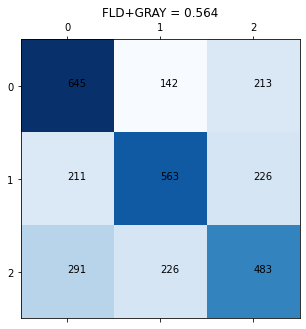

In [18]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

The accuracy of the grayscale images is lower because in grayscale we combine three channels into one channel which means less computations are needed for the grayscale image but also when we combine three channels into one channel we use alot of information about the image that could have made it more easy to classify, so it's a matter of tradeoff as we have to choose between less computation time and power with lower accuracy or more computational power and time but with higher accuracy.


##########
<hr style="border:2px solid black"> </hr>